<a href="https://colab.research.google.com/github/C-SIN-IN2028-001-2213/-Ex-Parc-2--3-/blob/main/Proyecto_Final_Titanic_Kim_y_Fidel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Titanic = "/content/drive/MyDrive/titanic passenger list (1).xlsx"

In [ ]:
Titanic="/content/drive/MyDrive/titanic passenger list (1).xlsx"

In [ ]:
df=pd.read_excel(Titanic)

df.head()

,PClass,survived,Name,Gender,Age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,Country Home,Country Destination
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,United States,NaN
1,1,Yes,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,Canada,Canada
2,1,No,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Canada,Canada
3,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Canada,Canada
4,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Canada,Canada


#01.País de origen y cantidad de pasajeros, cantidad de hombres y de mujeres
¿cuántos pasajeros 
había por país?,¿Cuántos 
hombres y cuántas mujeres? 

In [ ]:
pd.DataFrame(df.groupby(["Country Home"])["Gender"].count())

,Gender
Country Home,
Argentina,1
Canada,22
Cuba,1
England,83
Finland,3
France,14
Germany,1
Guernsey,1
India,5


In [ ]:
pd.DataFrame(df.groupby(["Gender"])['Name'].count())

,Name
Gender,
female,466
male,843


In [ ]:
pd.DataFrame(df.groupby(["Country Home","Gender"])['Name'].count())

Name
Country Home  Gender      
Argentina     male       1
Canada        female     9
              male      13
Cuba          male       1
England       female    31
              male      52
Finland       female     1
              male       2
France        female     6
              male       8
Germany       male       1
Guernsey      male       1
India         female     4
              male       1
Ireland       male       2
Italy         female     1
              male       1
Netherlands   male       1
Norway        male       1
Peru          male       1
South Africa  female     2
              male       1
Sweden        female     3
              male       4
Switzerland   female     4
              male       5
Thailand      female     1
              male       2
United States female   180
              male     244
Uruguay       female     3
              male       6

#02.Sobrevivientes y no sobrevivientes, y cuales de ellos eran
Uruguay female 3 hombres y mujmearles 
¿Cuántos pasajeros del 
Titanic sobrevivieron? Y 
¿Cuántos no sobrevivieron?, así 
como, ¿Cuántos eran hombres y 
cuántos eran mujeres?

In [ ]:
# Numero total de sobrevivientes y no sobrevivientes
pd.DataFrame(df.groupby(["survived"])["Name"].count())

,Name
survived,
No,809
Yes,500


In [ ]:
# Numero total de sobrevivientes y no sobrevivientes por genero

pd.DataFrame(df.groupby(["survived","Gender"])["Name"].count())

Name
survived Gender      
No       female   127
         male     682
Yes      female   339
         male     161

#03.Cantidad de pasajeros que sobrevivieron y los que no sobrevivieron por cada clase y por género

In [ ]:
#Numero de pasajeros que sobrevivieron y pasajeros que no sobrevivieron por clase.

pd.pivot_table(df, index=['survived','PClass'], aggfunc='count', values=['Name'])

Name
survived PClass      
No       1        123
         2        158
         3        528
Yes      1        200
         2        119
         3        181

In [ ]:
#Numero de pasajeros que sobrevivieron por clase, edad y genero.

pd.pivot_table(df, index=['survived','PClass',"Gender"], aggfunc='count', values=['Name'])

Name
survived PClass Gender      
No       1      female     5
                male     118
         2      female    12
                male     146
         3      female   110
                male     418
Yes      1      female   139
                male      61
         2      female    94
                male      25
         3      female   106
                male      75

#04.Edades que tenían los pasajeros y cuántos había de cada edad

In [ ]:
#Pasajeros por edad

pd.value_counts(round(df['Age']),0).to_frame(name="Frequency").rename_axis("Age").sort_values(by='Age')

,Frequency
Age,
0.0,3
1.0,19
2.0,12
3.0,7
4.0,10
...,...
70.0,3
71.0,2
74.0,1


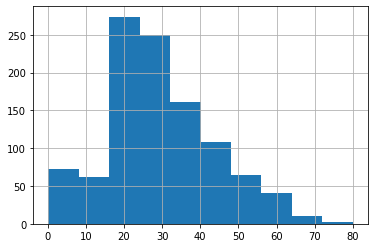

In [ ]:
df["Age"].hist()

# 0.5 Mapa 
Que visualice el 
país de origen de los pasajeros y 
la cantidad de pasajeros por cada 
país de origen.

In [ ]:
data = pd.read_csv ("/content/drive/MyDrive/titanic passenger list.csv")
data.head()

,PClass,survived,Name,Gender,Age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,Country Home,Country Destination,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,Yes,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,United States,NaN,NaN,NaN,NaN
1,1,Yes,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,Canada,Canada,NaN,NaN,NaN
2,1,No,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Canada,Canada,NaN,NaN,NaN
3,1,No,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Canada,Canada,NaN,NaN,NaN
4,1,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Canada,Canada,NaN,NaN,NaN


In [ ]:
! pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=eb96bdccbfeaeffbf6070fde5aa1788ba1593412e5773cbe4576dea2d60c68fa
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
data = dict(
        type = 'choropleth',
        locations = df['Country Home'],
    locationmode = 'country names',
        z = df['Gender'],
        text = df['Country Home'],
        colorbar = {'title' : 'Cantidad de pasajeros'},
      ) 

In [ ]:
layout = dict(
    title = 'Mapa',
    geo = dict(
        showframe = True,
        projection = {'type':'hammer'}
    )
)

In [ ]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)